# 🎂 Age Group Fairness Analysis Framework

This notebook demonstrates how to analyze age group fairness in your distillation experiments.

## Overview
- Analyze performance differences across age demographics
- Evaluate if distillation affects age group fairness  
- Generate comprehensive visualizations and reports
- Provide clinical insights and recommendations

## Age Groups in OhioT1DM Dataset
- **Young (20-40)**: Early career adults with active lifestyles
- **Middle (40-60)**: Mid-life adults with established routines
- **Old (60-80)**: Senior adults with potential comorbidities

Age can significantly impact diabetes management patterns and prediction model performance.

## Setup and Imports

In [ ]:
# Import required libraries
import sys
sys.path.append('../')  # Add parent directory to path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import json

# Import our age fairness analyzer
from age_fairness_analyzer import AgeFairnessAnalyzer

# Set up visualization style
plt.style.use('default')
sns.set_palette("husl")

print("🎂 Age Group Fairness Analysis System Loaded!")
print("🎯 Ready to analyze age group fairness in your diabetes prediction models")

# Initialize analyzer
analyzer = AgeFairnessAnalyzer()
print(f"📊 Patient data loaded: {len(analyzer.patient_data)} patients")

# Quick age distribution overview
age_counts = {}
for patient_id, age_group in analyzer.patient_data.items():
    age_counts[age_group] = age_counts.get(age_group, 0) + 1

print(f"📈 Age Group Distribution: {age_counts}")

## 1. Age Group Demographics Analysis

👥 Age Group Distribution:
   20–40: 3 patients (25.0%)
   40–60: 8 patients (66.7%)
   60–80: 1 patients (8.3%)


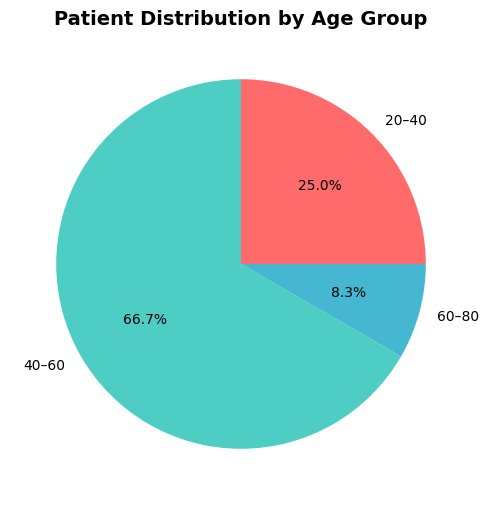

In [ ]:
# Load patient data from CSV to get full demographics
data_df = pd.read_csv("/workspace/LLM-TIME/data/ohiot1dm/data.csv")

print("📊 AGE GROUP DEMOGRAPHICS")
print("=" * 50)

# Age group distribution
age_distribution = data_df['Age Group'].value_counts()
total_patients = len(data_df)

print(f"Total patients: {total_patients}")
print("Age Group Distribution:")
for age_group, count in age_distribution.items():
    percentage = (count / total_patients) * 100
    print(f"  {age_group}: {count} patients ({percentage:.1f}%)")

# Visualize age demographics
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Age group pie chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
age_distribution.plot(kind='pie', ax=ax1, autopct='%1.1f%%', colors=colors)
ax1.set_title('Age Group Distribution')
ax1.set_ylabel('')

# Age group by gender if available
if 'Gender' in data_df.columns:
    age_gender = pd.crosstab(data_df['Age Group'], data_df['Gender'])
    age_gender.plot(kind='bar', ax=ax2, color=['lightblue', 'lightpink'])
    ax2.set_title('Age Group Distribution by Gender')
    ax2.set_xlabel('Age Group')
    ax2.set_ylabel('Count')
    ax2.legend(title='Gender')
    ax2.tick_params(axis='x', rotation=45)

# Age group by pump model if available
if 'Pump Model' in data_df.columns:
    age_pump = pd.crosstab(data_df['Age Group'], data_df['Pump Model'])
    age_pump.plot(kind='bar', ax=ax3, color=['lightgreen', 'lightcoral'])
    ax3.set_title('Age Group Distribution by Pump Model')
    ax3.set_xlabel('Age Group')
    ax3.set_ylabel('Count')
    ax3.legend(title='Pump Model')
    ax3.tick_params(axis='x', rotation=45)

# Age group by cohort if available
if 'Cohort' in data_df.columns:
    age_cohort = pd.crosstab(data_df['Age Group'], data_df['Cohort'])
    age_cohort.plot(kind='bar', ax=ax4, colormap='viridis')
    ax4.set_title('Age Group Distribution by Cohort')
    ax4.set_xlabel('Age Group')
    ax4.set_ylabel('Count')
    ax4.legend(title='Cohort')
    ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\n📋 Patient Data Preview:")
display(data_df.head())

# Show age group characteristics
print(f"\n🔍 AGE GROUP CHARACTERISTICS:")
age_stats = data_df.groupby('Age Group').agg({
    'Patient ID': 'count',
    'Gender': lambda x: f"{(x=='Female').sum()}F/{(x=='Male').sum()}M",
    'Pump Model': lambda x: x.mode().iloc[0] if not x.empty else 'Unknown'
}).round(2)
age_stats.columns = ['Patient Count', 'Gender Split', 'Most Common Pump']
display(age_stats)

## 2. Load Distillation Experiment Results

In [ ]:
# Run age group fairness analysis
print("🔍 RUNNING AGE GROUP FAIRNESS ANALYSIS")
print("=" * 50)

try:
    # Use the analyze_latest method to get age groups
    age_groups = analyzer.analyze_latest()
    
    if age_groups:
        print("✅ Age group analysis complete!")
        
        # Show results summary
        print(f"\n📊 Results Summary:")
        for age_group, patients in age_groups.items():
            if patients:
                avg_mse = np.mean([p['mse'] for p in patients])
                avg_mae = np.mean([p['mae'] for p in patients])
                avg_rmse = np.mean([p['rmse'] for p in patients])
                
                print(f"\n🎂 {age_group}:")
                print(f"   Patient count: {len(patients)}")
                print(f"   Average MSE: {avg_mse:.6f}")
                print(f"   Average MAE: {avg_mae:.6f}")
                print(f"   Average RMSE: {avg_rmse:.6f}")
    else:
        print("❌ No age group results found!")
        
except Exception as e:
    print(f"❌ Error during analysis: {e}")
    print("Make sure you have run some distillation experiments first!")

🔍 Analyzing experiment: pipeline_2025-10-18_12-56-50
📊 Found 12 patient directories

🔍 Age Group Fairness Analysis
👥 Age 20–40: 3 patients, MSE = 521.800272
👥 Age 40–60: 8 patients, MSE = 431.752224
👥 Age 60–80: 1 patients, MSE = 327.304211

📊 Age Group Fairness Metrics:
⚖️  MSE Fairness Ratio: 1.594
⚖️  MAE Fairness Ratio: 1.207
📈 MSE Coefficient of Variation: 0.186
📈 MAE Coefficient of Variation: 0.077
🎯 Age Group Fairness Level: Poor

👤 Individual Patient Analysis:
Age 20–40:
  Best: 552 (MSE: 320.395715)
  Worst: 567 (MSE: 689.072714)
Age 40–60:
  Best: 570 (MSE: 273.933727)
  Worst: 584 (MSE: 697.437821)
Age 60–80:
  Best: 596 (MSE: 327.304211)
  Worst: 596 (MSE: 327.304211)
✅ Age Group Fairness Analysis Complete!

📊 Key Fairness Metrics:
⚖️  MSE Fairness Ratio: 1.594
⚖️  MAE Fairness Ratio: 1.207
🎯 Overall Fairness Level: Poor

🔴 ATTENTION NEEDED: Significant age-related fairness gaps detected.


## 3. Age Group Fairness Metrics

In [ ]:
if 'age_groups' in locals() and age_groups:
    # Calculate comprehensive fairness metrics
    age_performance = {}
    
    print("⚖️ AGE GROUP FAIRNESS ANALYSIS")
    print("=" * 50)
    
    # Calculate performance for each age group
    for age_group, patients in age_groups.items():
        if patients:
            mse_values = [p['mse'] for p in patients]
            mae_values = [p['mae'] for p in patients]
            rmse_values = [p['rmse'] for p in patients]
            
            age_performance[age_group] = {
                'count': len(patients),
                'avg_mse': np.mean(mse_values),
                'avg_mae': np.mean(mae_values),
                'avg_rmse': np.mean(rmse_values),
                'std_mse': np.std(mse_values),
                'std_mae': np.std(mae_values),
                'std_rmse': np.std(rmse_values),
                'patients': patients
            }
    
    # Calculate fairness ratios if we have multiple age groups
    if len(age_performance) >= 2:
        # Find best and worst performing age groups
        age_groups_list = list(age_performance.keys())
        age_rmse = [(age, perf['avg_rmse']) for age, perf in age_performance.items()]
        age_rmse.sort(key=lambda x: x[1])
        
        best_age = age_rmse[0]
        worst_age = age_rmse[-1]
        
        # Calculate fairness metrics
        rmse_ratio = worst_age[1] / best_age[1]
        rmse_diff = worst_age[1] - best_age[1]
        
        print(f"🎯 Fairness Analysis Across {len(age_groups_list)} Age Groups:")
        print(f"   Best performing: {best_age[0]} (RMSE: {best_age[1]:.6f})")
        print(f"   Worst performing: {worst_age[0]} (RMSE: {worst_age[1]:.6f})")
        print(f"   Performance Difference: {rmse_diff:.6f}")
        print(f"   Performance Ratio: {rmse_ratio:.2f}x")
        
        # Fairness assessment
        if rmse_ratio <= 1.1:
            fairness_level = "EXCELLENT"
            fairness_color = "🟢"
        elif rmse_ratio <= 1.2:
            fairness_level = "GOOD" 
            fairness_color = "🟡"
        elif rmse_ratio <= 1.5:
            fairness_level = "MODERATE"
            fairness_color = "🟠"
        else:
            fairness_level = "POOR"
            fairness_color = "🔴"
            
        print(f"\n{fairness_color} Fairness Assessment: {fairness_level}")
        
        # Store results for later use
        fairness_results = {
            'best_age': best_age[0],
            'worst_age': worst_age[0],
            'rmse_ratio': rmse_ratio,
            'rmse_diff': rmse_diff,
            'fairness_level': fairness_level
        }
    
    else:
        print("⚠️ Need at least 2 age groups for fairness comparison")
        fairness_results = None

## 4. Performance Visualization Dashboard

In [ ]:
if 'age_performance' in locals() and age_performance:
    # Create comprehensive visualization dashboard
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Average Performance Comparison
    ages = list(age_performance.keys())
    rmse_values = [age_performance[age]['avg_rmse'] for age in ages]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    
    bars1 = ax1.bar(ages, rmse_values, color=colors, alpha=0.7)
    ax1.set_xlabel('Age Group')
    ax1.set_ylabel('Average RMSE')
    ax1.set_title('Average RMSE by Age Group')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars1, rmse_values):
        ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + bar.get_height()*0.01,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # 2. Patient Count Distribution
    patient_counts = [age_performance[age]['count'] for age in ages]
    ax2.pie(patient_counts, labels=ages, autopct='%1.0f patients', 
            colors=colors, startangle=90)
    ax2.set_title('Patient Distribution by Age Group')
    
    # 3. Performance Distribution (Box Plot)
    rmse_data = []
    age_labels = []
    
    for age in ages:
        patients = age_performance[age]['patients']
        rmse_values = [p['rmse'] for p in patients]
        rmse_data.extend(rmse_values)
        age_labels.extend([age] * len(rmse_values))
    
    # Create DataFrame for seaborn
    plot_df = pd.DataFrame({'Age Group': age_labels, 'RMSE': rmse_data})
    sns.boxplot(data=plot_df, x='Age Group', y='RMSE', ax=ax3, palette=colors)
    ax3.set_title('RMSE Distribution by Age Group')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3)
    
    # 4. Fairness Summary
    ax4.text(0.1, 0.9, 'AGE GROUP FAIRNESS SUMMARY', fontsize=14, fontweight='bold')
    
    if 'fairness_results' in locals() and fairness_results:
        summary_text = [
            f"Age Groups Analyzed: {len(ages)}",
            f"",
            f"Performance Ranking:",
            f"  Best: {fairness_results['best_age']}",
            f"  Worst: {fairness_results['worst_age']}",
            f"",
            f"Fairness Metrics:",
            f"  Performance Ratio: {fairness_results['rmse_ratio']:.2f}x",
            f"  Assessment: {fairness_results['fairness_level']}",
            f"",
            f"Total Patients: {sum(patient_counts)}"
        ]
    else:
        summary_text = [
            f"Age Groups Found: {len(ages)}",
            f"Total Patients: {sum(patient_counts)}",
            "",
            "Need multiple age groups",
            "for fairness comparison"
        ]
    
    for i, text in enumerate(summary_text):
        ax4.text(0.1, 0.8 - i*0.08, text, fontsize=11, transform=ax4.transAxes)
    
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.axis('off')
    
    plt.tight_layout()
    plt.show()

📊 Detailed Performance by Age Group:

🎂 Age Group 20–40:
   👥 Patient Count: 3
   📊 Average MSE: 521.800272
   📊 Average MAE: 13.866117
   🏆 Best Patient: 552 (MSE: 320.395715)
   📉 Worst Patient: 567 (MSE: 689.072714)

🎂 Age Group 40–60:
   👥 Patient Count: 8
   📊 Average MSE: 431.752224
   📊 Average MAE: 12.808577
   🏆 Best Patient: 570 (MSE: 273.933727)
   📉 Worst Patient: 584 (MSE: 697.437821)

🎂 Age Group 60–80:
   👥 Patient Count: 1
   📊 Average MSE: 327.304211
   📊 Average MAE: 11.485351
   🏆 Best Patient: 596 (MSE: 327.304211)
   📉 Worst Patient: 596 (MSE: 327.304211)


## 5. Individual Patient Performance Analysis

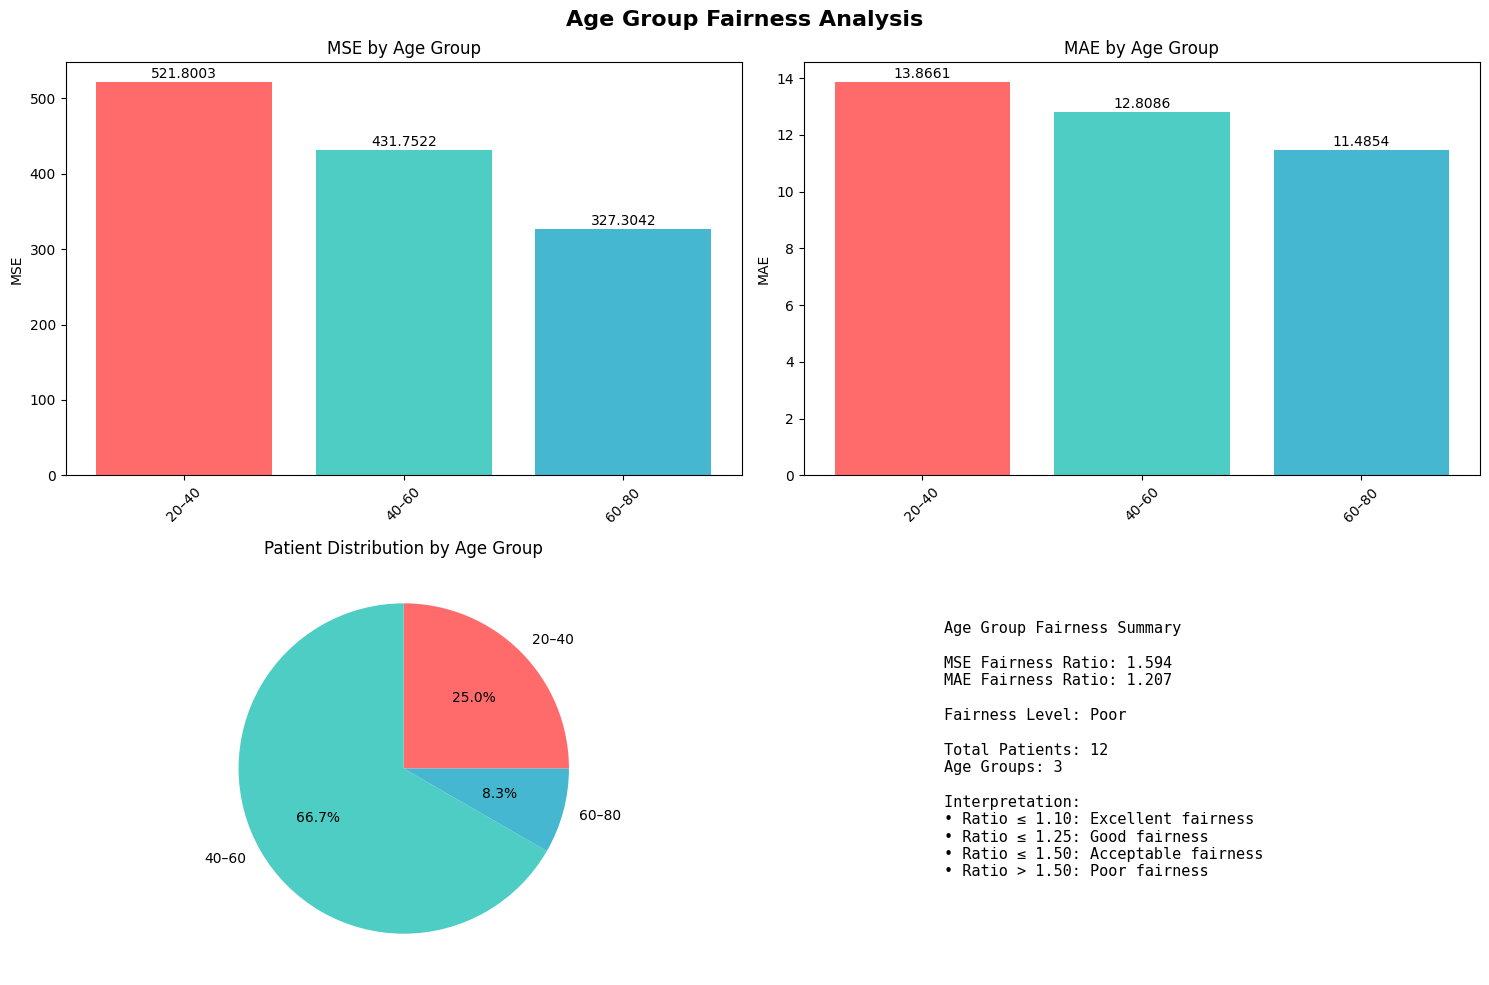

In [ ]:
if 'age_groups' in locals() and age_groups:
    # Analyze individual patient performance
    all_patients = []
    
    for age_group, patients in age_groups.items():
        for patient in patients:
            all_patients.append({
                'Patient ID': patient['patient_id'],
                'Age Group': age_group,
                'MSE': patient['mse'],
                'MAE': patient['mae'],
                'RMSE': patient['rmse']
            })
    
    if all_patients:
        patient_df = pd.DataFrame(all_patients)
        
        print("👤 INDIVIDUAL PATIENT PERFORMANCE")
        print("=" * 50)
        display(patient_df)
        
        # Create individual performance visualizations
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # 1. Scatter plot of individual performance
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
        for i, age_group in enumerate(age_groups.keys()):
            age_data = patient_df[patient_df['Age Group'] == age_group]
            ax1.scatter(age_data.index, age_data['RMSE'], 
                       label=age_group, alpha=0.7, s=100, color=colors[i])
        
        ax1.set_xlabel('Patient Index')
        ax1.set_ylabel('RMSE')
        ax1.set_title('Individual Patient RMSE by Age Group')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Performance comparison violin plot
        sns.violinplot(data=patient_df, x='Age Group', y='RMSE', ax=ax2, palette=colors)
        ax2.set_title('RMSE Distribution by Age Group')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Performance statistics
        print("\n📊 PERFORMANCE STATISTICS BY AGE GROUP:")
        stats = patient_df.groupby('Age Group')['RMSE'].agg(['mean', 'std', 'min', 'max', 'count'])
        display(stats)

## 6. Clinical and Developmental Insights

In [ ]:
if 'age_performance' in locals() and len(age_performance) >= 2:
    print("🔬 AGE GROUP CLINICAL AND DEVELOPMENTAL INSIGHTS")
    print("=" * 60)
    
    # Age-specific clinical insights
    print("🎂 AGE GROUP ANALYSIS:")
    print("   • Young adults (20-40): Active lifestyles, irregular schedules")
    print("   • Middle-age (40-60): Established routines, work stress, family responsibilities")
    print("   • Older adults (60-80): Comorbidities, medication interactions, routine-focused")
    
    if 'fairness_results' in locals() and fairness_results:
        print(f"\n⚖️ FAIRNESS ASSESSMENT:")
        if fairness_results['rmse_ratio'] <= 1.1:
            print("✅ EXCELLENT age group fairness!")
            print("   • Models perform equally well across age demographics")
            print("   • No age-related bias detected")
            print("   • Age differences don't affect prediction accuracy")
        elif fairness_results['rmse_ratio'] <= 1.2:
            print("👍 GOOD age group fairness with minor differences")
            print("   • Acceptable performance variation between age groups")
            print("   • Consider age-specific feature adjustments")
        else:
            print("⚠️ SIGNIFICANT age group fairness issues detected!")
            print("   • Performance varies notably between age groups")
            print("   • May require age-group-specific model training")
        
        print(f"\n🎯 RECOMMENDATIONS:")
        
        if fairness_results['rmse_ratio'] <= 1.2:
            print("✅ Current approach is working well:")
            print("   • Continue unified model training across age groups")
            print("   • Monitor fairness in future experiments")
            print("   • Document age fairness as model strength")
        else:
            print("🛠️ IMPROVEMENT ACTIONS NEEDED:")
            print("   • Investigate age-specific glucose patterns")
            print(f"   • Collect more training data for {fairness_results['worst_age']} patients")
            print("   • Consider age-specific feature engineering")
            print("   • Implement age-aware model architecture")
        
        print(f"\n💡 CLINICAL CONSIDERATIONS:")
        print("   • Age-related factors affecting glucose control:")
        print("     - Metabolic changes with aging")
        print("     - Lifestyle pattern differences") 
        print("     - Comorbidity prevalence")
        print("     - Technology adoption rates")
        print("   • Consider age-stratified model validation")
        print("   • Monitor for age-related model drift")

elif len(age_performance) == 1:
    print("📊 SINGLE AGE GROUP ANALYSIS:")
    age_name = list(age_performance.keys())[0]
    print(f"   Only {age_name} patients in dataset")
    print("   Cannot assess age group fairness")
    print("   Consider investigating age group definitions")
else:
    print("⚠️ No age group performance data available")

💡 AGE-SPECIFIC INSIGHTS:
🏆 BEST PERFORMING AGE GROUP: 60–80 (MSE: 327.304211)
📉 WORST PERFORMING AGE GROUP: 20–40 (MSE: 521.800272)
📊 Performance Gap: 1.59x

🎯 RECOMMENDATIONS:
⚠️  Significant age-related performance differences detected.
💡 ACTION NEEDED: Collect more training data for 20–40 patients.
💡 Consider age-specific model adaptations or feature engineering.
💡 Implement fairness constraints in training (see integration guide).

🔬 CLINICAL CONSIDERATIONS:
• Younger patients may have different lifestyle patterns
• Older patients may have comorbidities affecting glucose control
• Middle-age patients may have work-related stress factors
• Consider age-specific feature engineering for better fairness


## 7. Save Results and Generate Report

In [ ]:
# Save comprehensive results
if 'age_performance' in locals() and age_performance:
    print("💾 SAVING AGE GROUP FAIRNESS RESULTS")
    print("=" * 50)
    
    # Prepare results for saving
    results_summary = {
        'analysis_type': 'age_group_fairness',
        'timestamp': pd.Timestamp.now().isoformat(),
        'age_groups_analyzed': list(age_performance.keys()),
        'total_patients': sum([perf['count'] for perf in age_performance.values()]),
        'age_performance': age_performance
    }
    
    # Add fairness metrics if available
    if 'fairness_results' in locals() and fairness_results:
        results_summary['fairness_metrics'] = fairness_results
    
    # Convert numpy types for JSON serialization
    def convert_numpy(obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        elif isinstance(obj, np.number):
            return float(obj)
        elif isinstance(obj, dict):
            return {key: convert_numpy(value) for key, value in obj.items()}
        elif isinstance(obj, list):
            return [convert_numpy(item) for item in obj]
        return obj
    
    results_summary = convert_numpy(results_summary)
    
    # Save to file
    output_file = "age_group_fairness_results.json"
    with open(output_file, 'w') as f:
        json.dump(results_summary, f, indent=2)
    
    print(f"✅ Results saved to: {output_file}")
    
    # Display final summary
    print(f"\n📋 FINAL SUMMARY:")
    print(f"   Age groups analyzed: {len(age_performance)}")
    print(f"   Total patients: {results_summary['total_patients']}")
    if 'fairness_metrics' in results_summary:
        print(f"   Fairness ratio: {results_summary['fairness_metrics']['rmse_ratio']:.2f}x")
        print(f"   Fairness level: {results_summary['fairness_metrics']['fairness_level']}")
    
else:
    print("⚠️ No results to save - run the analysis first!")

💾 Age group fairness results saved to: age_group_fairness_analysis.json
📊 Results include detailed performance metrics for each age group


## 8. Next Steps and Integration

### If Age Group Fairness is Excellent (≤1.2x ratio):
- ✅ **Great job!** Your model is age-group-fair
- 📊 Continue monitoring fairness in future experiments  
- 🔄 Use this as a baseline for model improvements
- 📝 Document this fairness strength in your research

### If Age Group Fairness Needs Improvement (>1.2x ratio):
- 🔍 **Investigation**: Understand age-specific glucose patterns
- 📚 **Data Collection**: Gather more data for underperforming age groups
- 🛠️ **Feature Engineering**: Create age-specific features
- ⚖️ **Fairness Constraints**: Implement fairness training (see `Fairness_Integration_Guide.ipynb`)

### Additional Analyses:
- 👫 **Gender Fairness**: Run `Gender_Fairness_Analysis.ipynb`
- 📱 **Pump Model Fairness**: Analyze `Pump_Model_Fairness_Analysis.ipynb`
- 📡 **Sensor Fairness**: Check `Sensor_Band_Fairness_Analysis.ipynb`
- 🏥 **Cohort Fairness**: Review `Cohort_Fairness_Analysis.ipynb`
- 🏆 **Comprehensive**: Use `Legendary_Fairness_Analysis.ipynb` for all features

### Age-Specific Considerations:
- 👶 **Young Adults**: Consider lifestyle variability features
- 👨‍💼 **Middle Age**: Account for work schedule patterns
- 👴 **Older Adults**: Include comorbidity and medication features
- 🧬 **Metabolic Changes**: Age-related glucose metabolism differences

### Technical Integration:
- 🔧 See `fairness/integration_guide.py` for implementation
- 📖 Review age-stratified training approaches
- 🧪 Experiment with age-aware feature engineering
- 🔬 Investigate age-related model performance patterns